<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_T_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/MNQ20201206_to_20201211163500.pkl')

In [75]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [76]:
df.drop('time', axis=1, inplace=True)

In [77]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [78]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-12-06 18:00:00')

In [79]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [80]:
 


df["dev"] = df.close - df.open
df["jump"] = df.high - df.low
df["up"] = df.dev > 5
df["down"] = df.dev < -5 


 

In [81]:
df = df[df.jump.ne(0.0)]

In [82]:
df["stdv"] = df.dev.rolling(window=60, min_periods=1).std()
df["mu"] = df.dev.rolling(window=60, min_periods=1).mean()
df["t"] = (df.dev - df.mu) / df.stdv

In [83]:
df[(df.jump>2)].shape[0]

3504

In [84]:
df[(df.dev>2) | (df.dev<-2)].shape[0]

1741

In [85]:
df.head(n=100)

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,dev,jump,up,down,stdv,mu,t
0,12516.75,12527.50,12516.75,12527.50,12526.525,11,2020-12-06 18:00:00,18,0,0,6,0,10.75,10.75,True,False,NaN,10.750000,NaN
4,12526.00,12530.00,12525.00,12530.00,12527.000,3,2020-12-06 18:00:20,18,0,20,6,0,4.00,5.00,False,False,4.772971,7.375000,-0.707107
6,12530.00,12545.00,12530.00,12542.25,12540.575,11,2020-12-06 18:00:30,18,0,30,6,0,12.25,15.00,True,False,4.394599,9.000000,0.739544
7,12548.00,12564.75,12548.00,12564.75,12552.375,18,2020-12-06 18:00:35,18,0,35,6,0,16.75,16.75,True,False,5.281158,10.937500,1.100611
9,12555.50,12557.50,12552.00,12557.50,12553.275,7,2020-12-06 18:00:45,18,0,45,6,0,2.00,5.50,False,False,6.074023,9.150000,-1.177144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11316,12570.00,12575.00,12570.00,12575.00,12573.800,17,2020-12-07 09:43:00,9,43,0,7,0,5.00,5.00,False,False,2.021648,0.195833,2.376362
11319,12573.50,12577.25,12573.50,12577.25,12575.500,3,2020-12-07 09:43:15,9,43,15,7,0,3.75,3.75,False,False,2.068952,0.237500,1.697720
11330,12578.25,12579.75,12578.25,12579.75,12579.075,3,2020-12-07 09:44:10,9,44,10,7,0,1.50,1.50,False,False,2.072976,0.270833,0.592948
11355,12567.75,12570.25,12567.75,12569.75,12569.050,5,2020-12-07 09:46:15,9,46,15,7,0,2.00,2.50,False,False,2.080410,0.316667,0.809135


In [86]:
df["pf10sec"] = (df.avg.shift(-2)-df.avg).fillna(0.0)
df["pf30sec"] = (df.avg.shift(-6)-df.avg).fillna(0.0)
df["pfmin"] = (df.avg.shift(-12)-df.avg).fillna(0.0)
df.tail()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,dev,jump,up,down,stdv,mu,t,pf10sec,pf30sec,pfmin
81564,12365.00,12365.00,12364.50,12364.50,12364.750,2,2020-12-11 16:34:10,16,34,10,11,4,-0.50,0.5,False,False,0.976200,-0.050000,-0.460971,0.625,0.0,0.0
81566,12364.75,12365.25,12364.75,12365.25,12364.950,6,2020-12-11 16:34:20,16,34,20,11,4,0.50,0.5,False,False,0.976923,-0.033333,0.545932,-0.625,0.0,0.0
81569,12365.50,12365.50,12365.00,12365.00,12365.375,4,2020-12-11 16:34:35,16,34,35,11,4,-0.50,0.5,False,False,0.976923,-0.033333,-0.477690,-0.625,0.0,0.0
81570,12364.50,12364.50,12364.00,12364.00,12364.325,3,2020-12-11 16:34:40,16,34,40,11,4,-0.50,0.5,False,False,0.969194,-0.058333,-0.455705,0.000,0.0,0.0
81571,12364.25,12365.25,12364.25,12364.50,12364.750,4,2020-12-11 16:34:45,16,34,45,11,4,0.25,1.0,False,False,0.965690,-0.041667,0.302029,0.000,0.0,0.0


In [87]:
df[(df.pf10sec>5)|(df.pf10sec<-5)].shape[0]*(5*2-2*0.47)/2

6097.38

In [44]:
df.drop(df.head(10*12).index, inplace=True)
df.drop(df.tail(5*12).index, inplace=True)

In [143]:
data = df[(df.t < -3)&(df.Hour.isin([0,1,2,3,4,8,9,11,15,16,19,21]))]
data.shape

(43, 22)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


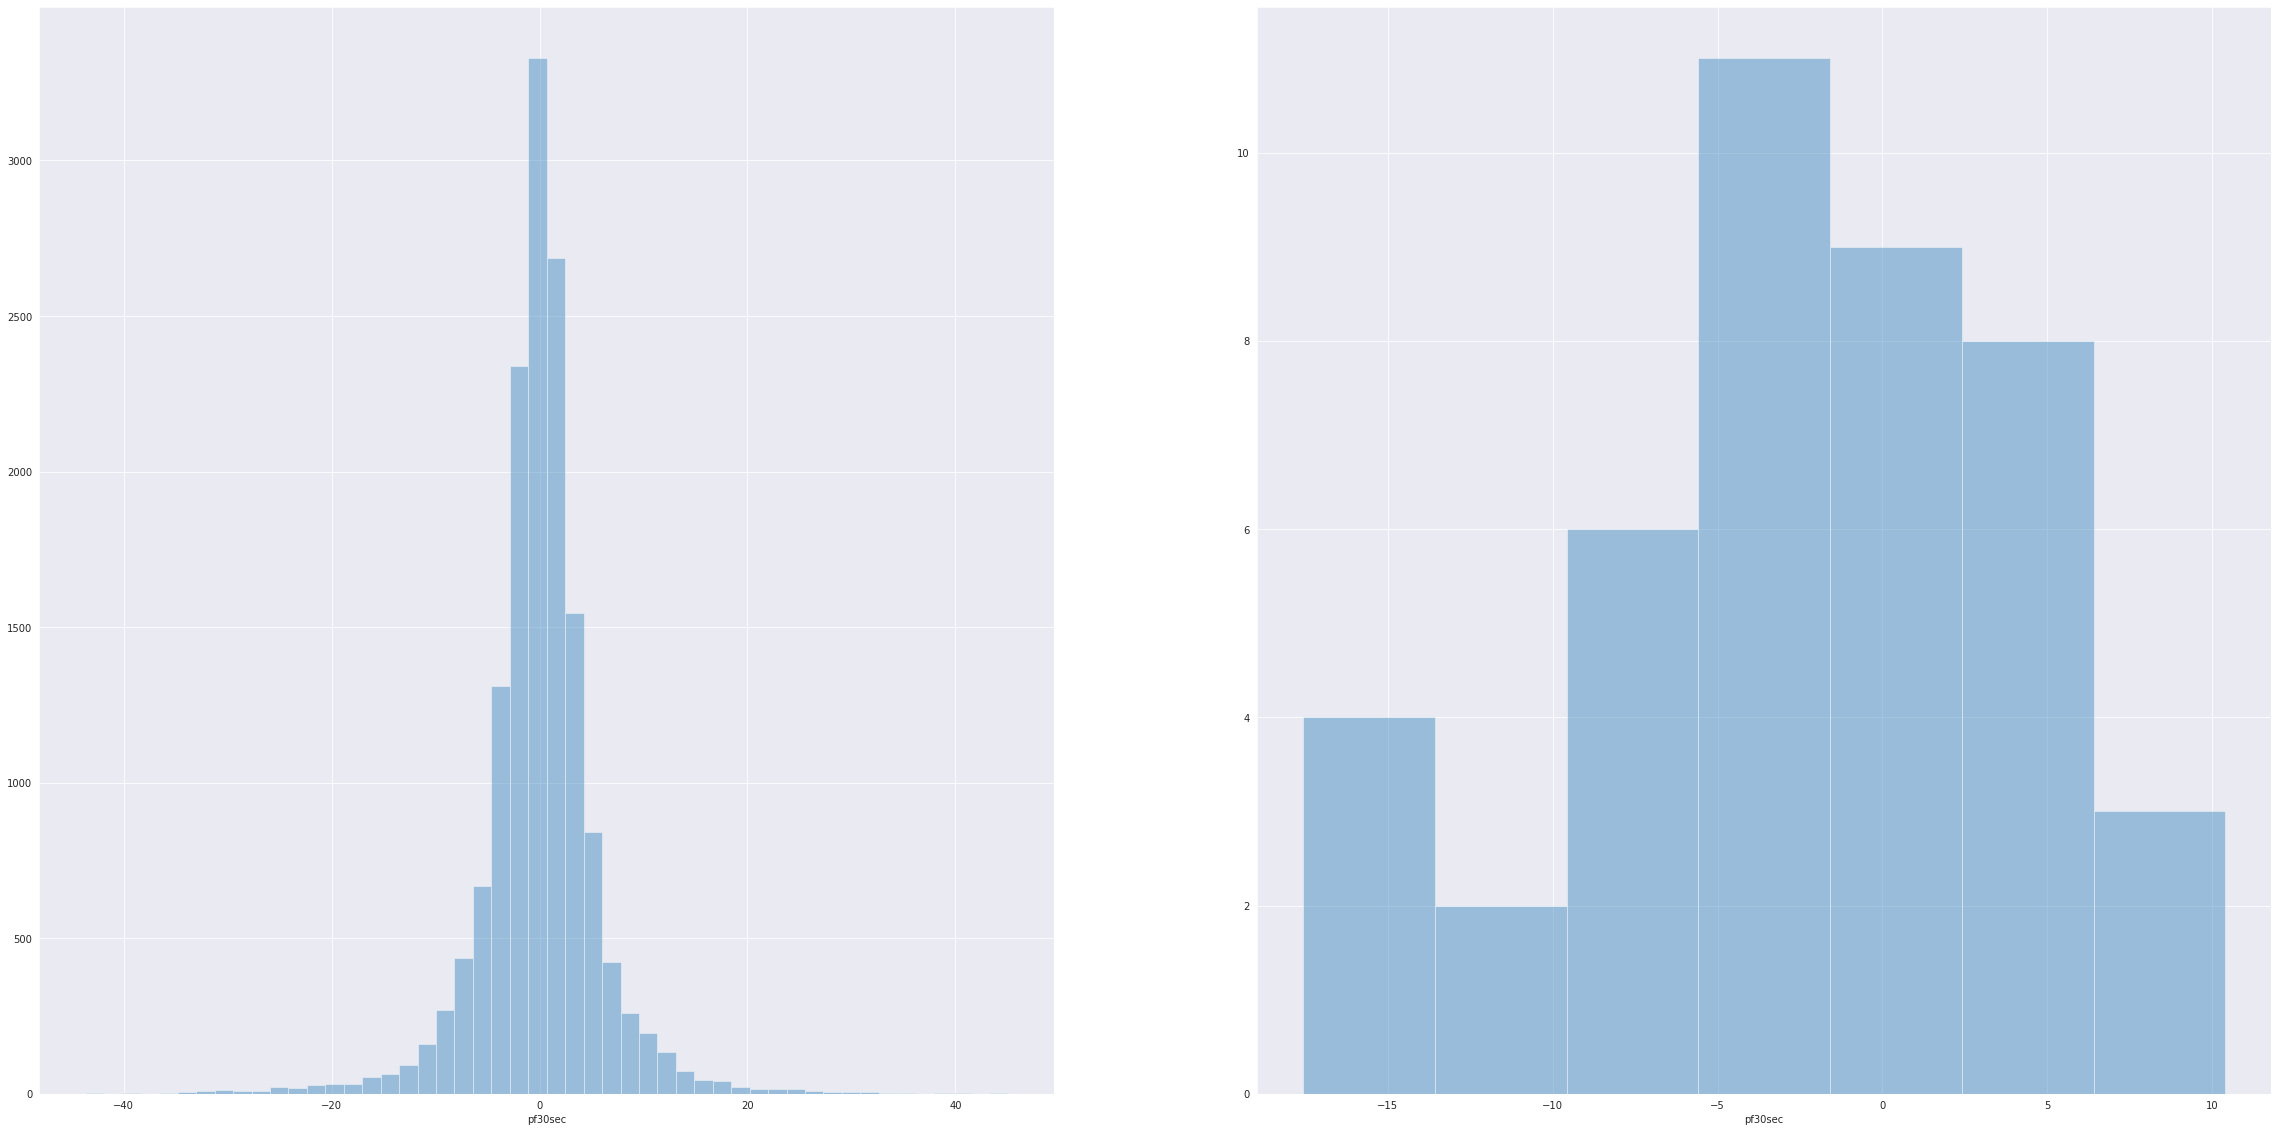

In [144]:
a4_dims = (40,20)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=a4_dims)
sns.distplot(df.pf30sec, kde=False, ax=axes[0])
sns.distplot(data.pf30sec, kde=False, ax=axes[1])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df.t)

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(data.pfmin)

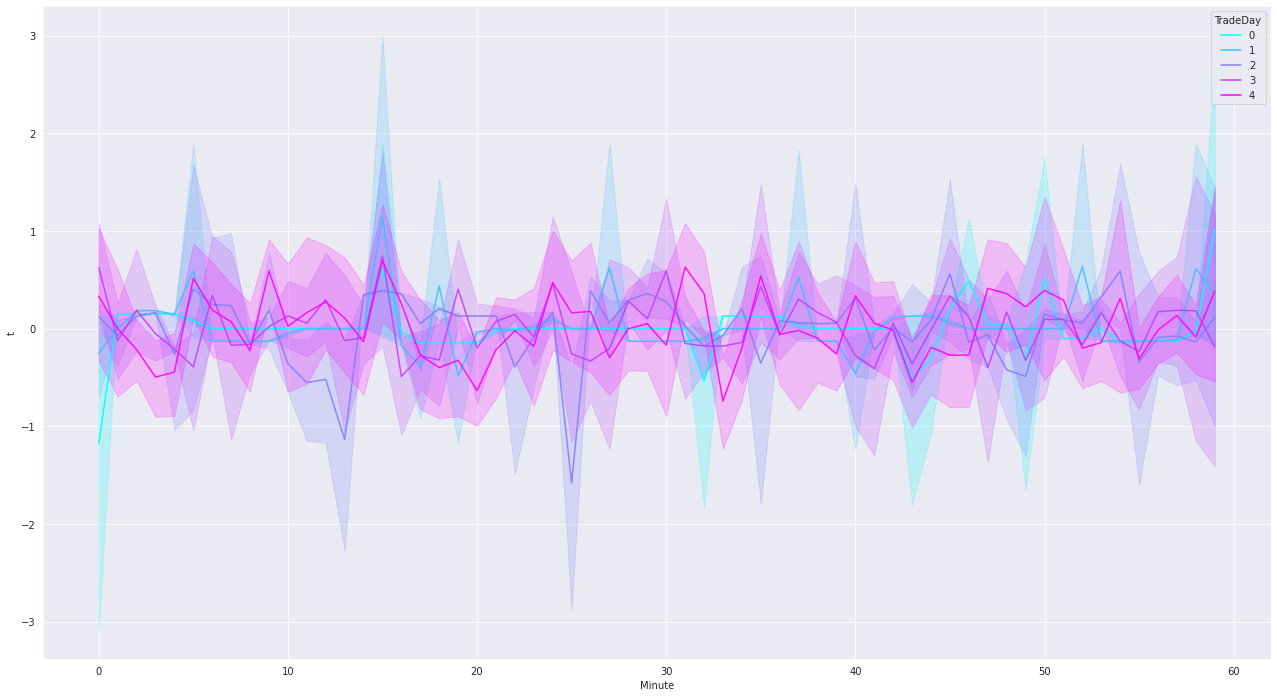

In [ ]:
data=df[df.Hour==15]
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.t, hue=data.TradeDay, palette="cool", dashes=False, alpha=0.9)

In [ ]:
df[abs(df.stdv)==0.0].groupby(df.Hour)["stdv"].count()


Hour
0      79
1      55
2      81
3      20
4      32
16    175
18     31
19     19
20     50
21    190
22    139
23    204
Name: stdv, dtype: int64

In [ ]:
for index, row in df.iterrows():
  if row["t_val24"] > 2:
    print(row["avg"])